## SQLAlchemy Homework - Surfs Up!

#### Import Modules 

In [2]:
#### %matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

#### Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect 

##### Use SQLAlchemy create_engine to connect to your sqlite database.

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
engine

Engine(sqlite:///Resources/hawaii.sqlite)

In [5]:
# Reflect an existing database into a new model
inspector = inspect(engine)

# Reflect the tables
inspector.get_table_names()


['measurement', 'station']

In [6]:
# Get table headers of table 'measurement'
data = engine.execute("PRAGMA table_info(measurement);")

for record in data:
    print(record)

(0, 'id', 'INTEGER', 1, None, 1)
(1, 'station', 'TEXT', 0, None, 0)
(2, 'date', 'TEXT', 0, None, 0)
(3, 'prcp', 'FLOAT', 0, None, 0)
(4, 'tobs', 'FLOAT', 0, None, 0)


In [7]:
# Get table headers of table 'measurement'
data = engine.execute("PRAGMA table_info(station);")

for record in data:
    print(record)

(0, 'id', 'INTEGER', 1, None, 1)
(1, 'station', 'TEXT', 0, None, 0)
(2, 'name', 'TEXT', 0, None, 0)
(3, 'latitude', 'FLOAT', 0, None, 0)
(4, 'longitude', 'FLOAT', 0, None, 0)
(5, 'elevation', 'FLOAT', 0, None, 0)


#### Use SQLAlchemy `automap_base()` to reflect your tables into classes and save a reference to those classes called `Station` and `Measurement`.

In [8]:
# View all of the classes that automap found


Base = automap_base()
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


#### Link Python to the database by creating an SQLAlchemy session.

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine) 

# Exploratory Precipitation Analysis

#### Find the most recent date in the data set.

In [10]:
most_recent = session.query(Measurement.date).\
order_by(Measurement.date.desc()).first()
most_recent
#print(f; most_recent

('2017-08-23')

#### Retrieve the last 12 months of precipitation data by querying the 12 preceding months of data. 

In [11]:
last_twelve = (dt.datetime.strptime(most_recent[0], '%Y-%m-%d') - dt.timedelta(days=365)).date()
last_twelve

datetime.date(2016, 8, 23)

#### Select only the `date` and `prcp` values
* Sort the values by `date`

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
rain_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= last_twelve ).order_by(Measurement.date).all()

rain_data

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

#### Load the query results into a Pandas DataFrame 
* Set the index to the date column
* Clean data, dropping all null values

In [13]:
# Create Pandas DataFrame
rain_df = pd.DataFrame(rain_data).dropna().set_index('date')
rain_df


,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


#### Plot the results using the DataFrame `plot` method.

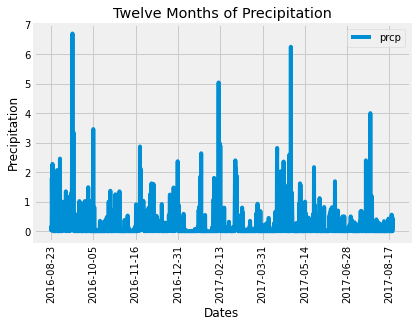

In [14]:
# Plot the results using the DataFrame `plot` method.
ax = rain_df.plot(rot=90, x_compat=True)
figsize=(30,10)
plt.xlabel('Dates')
plt.ylabel('Precipitation')
plt.title('Twelve Months of Precipitation')
plt.grid(True)

plt.savefig("Output/monthly_prcp_data")

# Display histogram
plt.show() 

#### Use Pandas to calculate the summary statistics for the precipitation data

In [15]:
rain_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

#### Design a query to calculate the total number stations in the dataset

In [16]:
# Method 1
locations = session.query(Station)
print("Total Number Stations: {}".format(locations.count()))

# Method 2
#method_2 = engine.execute('SELECT station, count(station) FROM Station').fetchall() 
#method_2

Total Number Stations: 9


#### Design a query to find the most active stations (i.e. what stations have the most rows?)

In [19]:
results = session.query(Measurement.station, func.count(Measurement.station)).\
        group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

most_active_station = results[0][0]

print(f' Most active Station: ')
print(f' --------------------- ')
print(f' Station Details: {most_active_station}')
      

 Most active Station: 
 --------------------- 
 Station Details: USC00519281


#### Identify which station id has the highest number of observations

In [20]:
station_observations = results[0][-1]

print(f' Most observations: ')
print(f' --------------------- ')
print(f' Station Details: {station_observations}')
      

 Most observations: 
 --------------------- 
 Station Details: 2772


#### List the stations and the counts in descending order

In [34]:
stations = session.query(Station.station, Station.name).all()
print(stations)

[('USC00519397', 'WAIKIKI 717.2, HI US'), ('USC00513117', 'KANEOHE 838.1, HI US'), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US'), ('USC00517948', 'PEARL CITY, HI US'), ('USC00518838', 'UPPER WAHIAWA 874.3, HI US'), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US'), ('USC00519281', 'WAIHEE 837.5, HI US'), ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US'), ('USC00516128', 'MANOA LYON ARBO 785.2, HI US')]


In [38]:
station_list = session.query(Measurement.station, func.count(Measurement.station))

observation_counts = total_stations_query.group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

station_observations = pd.DataFrame(observation_counts ,columns=['Station Name', 'Count'])
station_observations

,Station Name,Count
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


#### Using the most active station id, calculate the lowest, highest, and average temperature.
* Hint: You will need to use a function such as `func.min`, `func.max`, `func.avg`, and `func.count` in your queries.


In [24]:
temperature_frequencies = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active_station).all()
print(f"The Lowest, Highest & the average temperature for most active station {most_active_station} is :")
print(f" Low  : {temperature_frequencies[0][0]}")
print(f" High : {temperature_frequencies[0][1]}")
print(f" Avg  : {temperature_frequencies[0][2]}")

The Lowest, Highest & the average temperature for most active station USC00519281 is :
 Low  : 54.0
 High : 85.0
 Avg  : 71.66378066378067


#### Design a query to retrieve the last 12 months of temperature observation data (TOBS).

In [25]:
# Step 1: Identify Latest Date
latest_date = session.query(Measurement.date, Measurement.tobs).order_by(Measurement.date.desc()).first()
latest_date

('2017-08-23', 81.0)

In [26]:
# Step 2: Calculate a time delta
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Use print function to display year, month, day and remove datetime.date object
print(query_date)

2016-08-23


In [27]:
# Step 3: Retrieve last 12 months of temperature observation data
session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date > '2016-08-23').\
    order_by(Measurement.date).all()

[('2016-08-24', 79.0),
 ('2016-08-24', 76.0),
 ('2016-08-24', 80.0),
 ('2016-08-24', 78.0),
 ('2016-08-24', 79.0),
 ('2016-08-24', 77.0),
 ('2016-08-24', 74.0),
 ('2016-08-25', 80.0),
 ('2016-08-25', 77.0),
 ('2016-08-25', 81.0),
 ('2016-08-25', 81.0),
 ('2016-08-25', 80.0),
 ('2016-08-25', 80.0),
 ('2016-08-25', 77.0),
 ('2016-08-26', 79.0),
 ('2016-08-26', 78.0),
 ('2016-08-26', 81.0),
 ('2016-08-26', 81.0),
 ('2016-08-26', 84.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 77.0),
 ('2016-08-27', 73.0),
 ('2016-08-27', 81.0),
 ('2016-08-27', 81.0),
 ('2016-08-27', 75.0),
 ('2016-08-27', 74.0),
 ('2016-08-28', 78.0),
 ('2016-08-28', 73.0),
 ('2016-08-28', 81.0),
 ('2016-08-28', 80.0),
 ('2016-08-28', 73.0),
 ('2016-08-28', 71.0),
 ('2016-08-29', 78.0),
 ('2016-08-29', 78.0),
 ('2016-08-29', 80.0),
 ('2016-08-29', 80.0),
 ('2016-08-29', 79.0),
 ('2016-08-29', 78.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 79.0),
 ('2016-08-30', 76.0),
 ('2016-08-30', 79.0),
 ('2016-08-30', 78.0),
 ('2016-08-

#### Filter by the station with the highest number of observations.

In [28]:
# Retrieve previously created variable
most_active_station

'USC00519281'

#### Query the last 12 months of temperature observation data for this station

In [30]:
temps_most_active = session.query(Measurement.date, Measurement.tobs).filter(
    Measurement.station == most_active_station).filter(
    Measurement.date >= query_date).group_by(Measurement.date).all()

temps_most_active

[('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-

#### Plot the results as a histogram with 'bins =12'


In [31]:
# Step 1: Transfer data into DataFrame for initial set-up
temps_most_active_df = pd.DataFrame(temps_most_active).dropna().set_index('date')
temps_most_active_df


,tobs
date,
2016-08-23,77.0
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0
...,...
2017-08-14,77.0
2017-08-15,77.0
2017-08-16,76.0


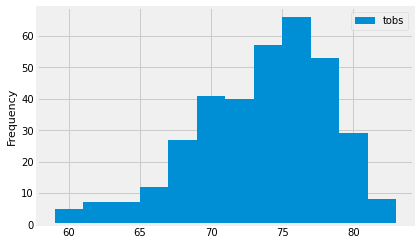

In [32]:
# Step 2: Plot DataFrame as a histogram (bins=12)
plt.hist(temps_most_active_df['tobs'],12, label="tobs")
plt.ylabel("Frequency", fontsize=11)
plt.legend()

# Save Image
plt.savefig("Output/Temp_for_active station_last_12months.png")

# Display histogram
plt.show()

# Close session

In [ ]:
# Close Session
session.close()